In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
df = pd.read_csv(r'C:\Users\chand\Desktop\Robot Sensing & Navigation\Assignments\LAB3\imu_new.csv')

In [145]:
df.head()

%time  field.header.seq  field.header.stamp  field.orientation.x  \
0  1.646100e+18                 1        1.646100e+18               92.358   
1  1.646100e+18                 2        1.646100e+18               92.357   
2  1.646100e+18                 3        1.646100e+18               92.357   
3  1.646100e+18                 4        1.646100e+18               92.357   
4  1.646100e+18                 5        1.646100e+18               92.357   

   field.orientation.y  field.orientation.z  field.angular_velocity.x  \
0               -0.117                0.611                 -0.000893   
1               -0.117                0.612                  0.000312   
2               -0.117                0.612                  0.000024   
3               -0.117                0.612                  0.000824   
4               -0.117                0.612                  0.000723   

   field.angular_velocity.y  field.angular_velocity.z  \
0                 -0.000016                 -0.000257   
1                 -0.000545                 -0.000980   
2                 -0.000490                 -0.000649   
3                  0.000039                 -0.000713   
4                  0.000148                 -0.000339   

   field.linear_acceleration.x  field.linear_acceleration.y  \
0                       -0.015                       -0.106   
1                       -0.041                       -0.095   
2                       -0.041                       -0.113   
3                       -0.018                       -0.101   
4                       -0.014                       -0.111   

   field.linear_acceleration.z  
0                       -9.927  
1                       -9.930  
2                       -9.907  
3                       -9.930  
4                       -9.943

In [146]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 14

In [147]:
df["time"] = df["%time"].transform(lambda x: x - x.min())
df["Time"] = df["field.header.seq"].transform(lambda x: x - x.min())
df["orientation_error.x"] = df["field.orientation.x"].transform(lambda x: x - x.mean())
df["orientation_error.y"] = df["field.orientation.y"].transform(lambda x: x - x.mean())
df["orientation_error.z"] = df["field.orientation.z"].transform(lambda x: x - x.mean())

df["angular_velocity_error.x"] = df["field.angular_velocity.x"].transform(lambda x: x - x.mean())
df["angular_velocity_error.y"] = df["field.angular_velocity.y"].transform(lambda x: x - x.mean())
df["angular_velocity_error.z"] = df["field.angular_velocity.z"].transform(lambda x: x - x.mean())

df["linear_acceleration_error.x"] = df["field.linear_acceleration.x"].transform(lambda x: x - x.mean())
df["linear_acceleration_error.y"] = df["field.linear_acceleration.y"].transform(lambda x: x - x.mean())
df["linear_acceleration_error.z"] = df["field.linear_acceleration.z"].transform(lambda x: x - x.mean())


df.head()

%time  field.header.seq  field.header.stamp  field.orientation.x  \
0  1.646100e+18                 1        1.646100e+18               92.358   
1  1.646100e+18                 2        1.646100e+18               92.357   
2  1.646100e+18                 3        1.646100e+18               92.357   
3  1.646100e+18                 4        1.646100e+18               92.357   
4  1.646100e+18                 5        1.646100e+18               92.357   

   field.orientation.y  field.orientation.z  field.angular_velocity.x  \
0               -0.117                0.611                 -0.000893   
1               -0.117                0.612                  0.000312   
2               -0.117                0.612                  0.000024   
3               -0.117                0.612                  0.000824   
4               -0.117                0.612                  0.000723   

   field.angular_velocity.y  field.angular_velocity.z  \
0                 -0.000016                 -0.000257   
1                 -0.000545                 -0.000980   
2                 -0.000490                 -0.000649   
3                  0.000039                 -0.000713   
4                  0.000148                 -0.000339   

   field.linear_acceleration.x  ...  Time  orientation_error.x  \
0                       -0.015  ...     0             -0.12614   
1                       -0.041  ...     1             -0.12714   
2                       -0.041  ...     2             -0.12714   
3                       -0.018  ...     3             -0.12714   
4                       -0.014  ...     4             -0.12714   

   orientation_error.y  orientation_error.z  angular_velocity_error.x  \
0             0.118483            -0.011521                 -0.000979   
1             0.118483            -0.010521                  0.000226   
2             0.118483            -0.010521                 -0.000062   
3             0.118483            -0.010521                  0.000738   
4             0.118483            -0.010521                  0.000637   

   angular_velocity_error.y  angular_velocity_error.z  \
0                  0.000004                 -0.000255   
1                 -0.000525                 -0.000978   
2                 -0.000470                 -0.000647   
3                  0.000059                 -0.000711   
4                  0.000168                 -0.000337   

   linear_acceleration_error.x  linear_acceleration_error.y  \
0                     0.025286                     0.000087   
1                    -0.000714                     0.011087   
2                    -0.000714                    -0.006913   
3                     0.022286                     0.005087   
4                     0.026286                    -0.004913   

   linear_acceleration_error.z  
0                    -0.026352  
1                    -0.029352  
2                    -0.006352  
3                    -0.029352  
4                    -0.042352  

[5 rows x 23 columns]

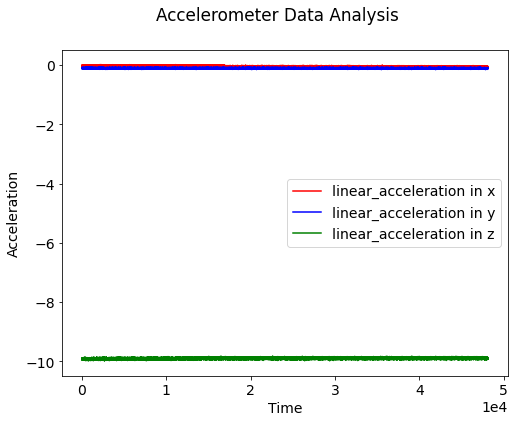

In [149]:
fig = plt.figure()
plt.plot(df["Time"], df["field.linear_acceleration.x"], color = 'red')
plt.plot(df["Time"], df["field.linear_acceleration.y"], color = 'blue')
plt.plot(df["Time"], df["field.linear_acceleration.z"], color = 'green')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
fig.suptitle("Accelerometer Data Analysis")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend(['linear_acceleration in x',"linear_acceleration in y", "linear_acceleration in z"], loc =0)
plt.show()

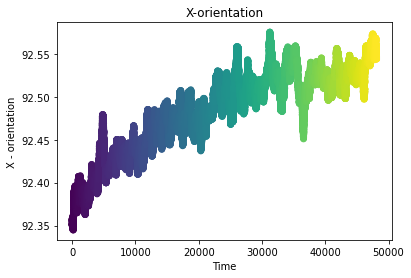

92.48413962577753
0.047443151039729924


In [7]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('X - orientation')
plt.title('X-orientation')
plt.scatter( df['Time'], df["field.orientation.x"], c=df['Time'])
#plt.scatter(df["utm_e"].mean(), df["utm_n"].mean(), color='r',s = 20, marker='*', alpha=1)
plt.show()

print(df["field.orientation.x"].mean())
print(df["field.orientation.x"].std())


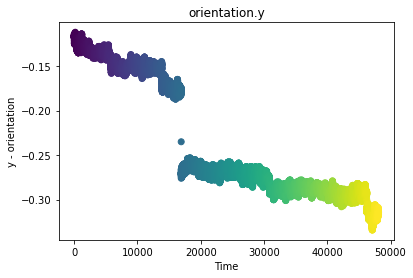

In [8]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('y - orientation')
plt.title('orientation.y')
plt.scatter( df['Time'], df["field.orientation.y"], c=df['Time'])
#plt.scatter(df["utm_e"].mean(), df["utm_n"].mean(), color='r',s = 20, marker='*', alpha=1)
plt.show()

In [9]:
print(df["field.orientation.y"].mean())
print(df["field.orientation.y"].std())

-0.23548264033264668
0.06572543157924893


In [10]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('Z - orientation')
plt.title('orientation.Z')
plt.scatter( df['Time'], df["field.orientation.z"], c=df['Time'])
#plt.scatter(df["utm_e"].mean(), df["utm_n"].mean(), color='r',s = 20, marker='*', alpha=1)
plt.show()

In [11]:
print(df["field.orientation.z"].mean())
print(df["field.orientation.z"].std())

0.6225207900207445
0.006485609006173239


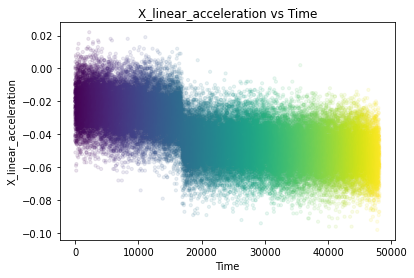

In [66]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('X_linear_acceleration')
plt.title('X_linear_acceleration vs Time')
plt.scatter(df['Time'], df["field.linear_acceleration.x"], c=df['Time'],s = 10, marker='o', alpha=0.1)
plt.show()


In [14]:
print(df["field.linear_acceleration.x"].mean())
print(df["field.linear_acceleration.x"].std())

-0.04028569646569614
0.016598730931773106


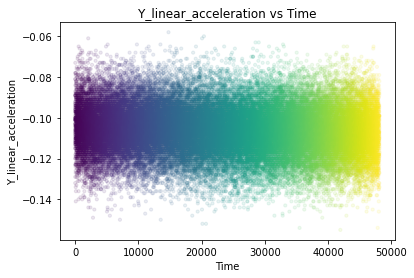

In [65]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('Y_linear_acceleration')
plt.title('Y_linear_acceleration vs Time')
plt.scatter(df['Time'], df["field.linear_acceleration.y"], c=df['Time'],s = 10, marker='o', alpha=0.1)
plt.show()

In [16]:
print(df["field.linear_acceleration.y"].mean())
print(df["field.linear_acceleration.y"].std())

-0.10608727650727488
0.012210008077218004


In [67]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('Z_linear_acceleration')
plt.title('Z_linear_acceleration vs Time')
plt.scatter(df['Time'], df["field.linear_acceleration.z"], c=df['Time'],s = 10, marker='o', alpha=0.1)
plt.show()

In [18]:
print(df["field.linear_acceleration.z"].mean())
print(df["field.linear_acceleration.z"].std())

-9.90064835758824
0.020294949959830347


In [83]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('angular_velocity X')
plt.title('angular_velocity X')
plt.ylim(-0.004, 0.004)
plt.scatter(df['Time'], df["field.angular_velocity.x"], c=df['Time'],s = 10, marker='o', alpha=0.7)
plt.show()

In [20]:
print(df["field.angular_velocity.x"].mean())
print(df["field.angular_velocity.x"].std())

8.645482328482372e-05
0.0005621810339142132


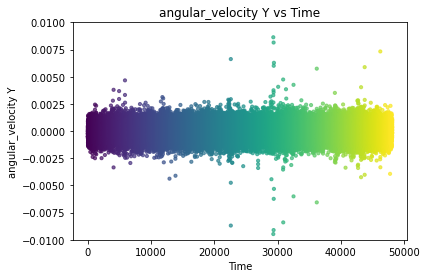

In [85]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('angular_velocity Y')
plt.ylim(-0.01, 0.01)
plt.title('angular_velocity Y vs Time')
plt.scatter(df['Time'], df["field.angular_velocity.y"], c=df['Time'],s = 10, marker='o', alpha=0.7)
plt.show()

In [22]:
print(df["field.angular_velocity.y"].mean())
print(df["field.angular_velocity.y"].std())

-2.023334719334726e-05
0.0007685067100002954


In [84]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('angular_velocity Z')
plt.title('angular_velocity Z')
plt.ylim(-0.01, 0.01)
plt.scatter(df['Time'], df["field.angular_velocity.z"], c=df['Time'],s = 10, marker='o', alpha=0.7)
plt.show()

In [143]:
df.head()

%time  field.header.seq  field.header.stamp  field.orientation.x  \
0  1.646100e+18                 1        1.646100e+18               92.358   
1  1.646100e+18                 2        1.646100e+18               92.357   
2  1.646100e+18                 3        1.646100e+18               92.357   
3  1.646100e+18                 4        1.646100e+18               92.357   
4  1.646100e+18                 5        1.646100e+18               92.357   

   field.orientation.y  field.orientation.z  field.angular_velocity.x  \
0               -0.117                0.611                 -0.000893   
1               -0.117                0.612                  0.000312   
2               -0.117                0.612                  0.000024   
3               -0.117                0.612                  0.000824   
4               -0.117                0.612                  0.000723   

   field.angular_velocity.y  field.angular_velocity.z  \
0                 -0.000016                 -0.000257   
1                 -0.000545                 -0.000980   
2                 -0.000490                 -0.000649   
3                  0.000039                 -0.000713   
4                  0.000148                 -0.000339   

   field.linear_acceleration.x  field.linear_acceleration.y  \
0                       -0.015                       -0.106   
1                       -0.041                       -0.095   
2                       -0.041                       -0.113   
3                       -0.018                       -0.101   
4                       -0.014                       -0.111   

   field.linear_acceleration.z  
0                       -9.927  
1                       -9.930  
2                       -9.907  
3                       -9.930  
4                       -9.943

In [24]:
print(df["field.angular_velocity.z"].mean())
print(df["field.angular_velocity.z"].std())`

-2.2283783783784067e-06
0.0006401602887807017


In [148]:
fig = plt.figure()
plt.plot(df["Time"], df["field.angular_velocity.x"], color = 'red', label = 'magnetic_field')
plt.plot(df["Time"], df["field.angular_velocity.y"], color = 'blue')
plt.plot(df["Time"], df["field.angular_velocity.z"], color = 'green')
#plt.plot(df["Time"], df["field.orientation.w"], color = 'yellow')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
fig.suptitle("Gyroscope Data Analysis")
plt.xlabel("Time")
plt.ylabel("Angular Velocity")
plt.legend(['Angular Velocity in x',"Angular Velocity in y", "Angular Velocity in z"], loc =0)

In [28]:
df.head()

%time  field.header.seq  field.header.stamp  field.orientation.x  \
0  1.646100e+18                 1        1.646100e+18               92.358   
1  1.646100e+18                 2        1.646100e+18               92.357   
2  1.646100e+18                 3        1.646100e+18               92.357   
3  1.646100e+18                 4        1.646100e+18               92.357   
4  1.646100e+18                 5        1.646100e+18               92.357   

   field.orientation.y  field.orientation.z  field.angular_velocity.x  \
0               -0.117                0.611                 -0.000893   
1               -0.117                0.612                  0.000312   
2               -0.117                0.612                  0.000024   
3               -0.117                0.612                  0.000824   
4               -0.117                0.612                  0.000723   

   field.angular_velocity.y  field.angular_velocity.z  \
0                 -0.000016                 -0.000257   
1                 -0.000545                 -0.000980   
2                 -0.000490                 -0.000649   
3                  0.000039                 -0.000713   
4                  0.000148                 -0.000339   

   field.linear_acceleration.x  ...  Time  orientation_error.x  \
0                       -0.015  ...     0              0.12614   
1                       -0.041  ...     1              0.12714   
2                       -0.041  ...     2              0.12714   
3                       -0.018  ...     3              0.12714   
4                       -0.014  ...     4              0.12714   

   orientation_error.y  orientation_error.z  angular_velocity_error.x  \
0             0.118483             0.011521                  0.000979   
1             0.118483             0.010521                  0.000226   
2             0.118483             0.010521                  0.000062   
3             0.118483             0.010521                  0.000738   
4             0.118483             0.010521                  0.000637   

   angular_velocity_error.y  angular_velocity_error.z  \
0                  0.000004                  0.000255   
1                  0.000525                  0.000978   
2                  0.000470                  0.000647   
3                  0.000059                  0.000711   
4                  0.000168                  0.000337   

   linear_acceleration_error.x  linear_acceleration_error.y  \
0                     0.025286                     0.000087   
1                     0.000714                     0.011087   
2                     0.000714                     0.006913   
3                     0.022286                     0.005087   
4                     0.026286                     0.004913   

   linear_acceleration_error.z  
0                     0.026352  
1                     0.029352  
2                     0.006352  
3                     0.029352  
4                     0.042352  

[5 rows x 23 columns]

In [101]:
import pylab as pl
A2 = np.arange(-0.06, 0.06, 0.001).tolist()
df.hist(column='linear_acceleration_error.x', bins=A2)
pl.title('Histogram plot of linear_acceleration X')
pl.xlabel("linear_acceleration X")
pl.show()


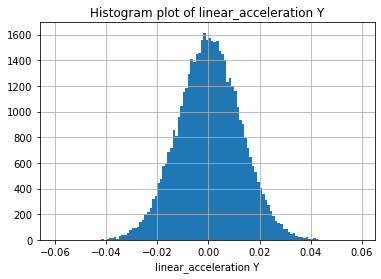

In [102]:
df.hist(column='linear_acceleration_error.y', bins=A2)
pl.title('Histogram plot of linear_acceleration Y')
pl.xlabel("linear_acceleration Y")
pl.show()


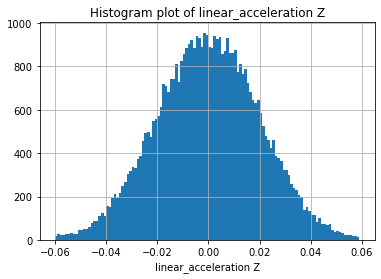

In [103]:
df.hist(column='linear_acceleration_error.z', bins=A2)
pl.title('Histogram plot of linear_acceleration Z')
pl.xlabel("linear_acceleration Z")
pl.show()

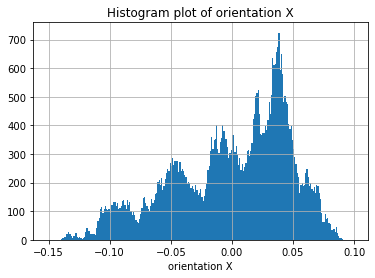

In [97]:
A = np.arange(-0.15, 0.10, 0.001).tolist()
df.hist(column='orientation_error.x', bins=A)
pl.title('Histogram plot of orientation X')
pl.xlabel("orientation X")
pl.show()

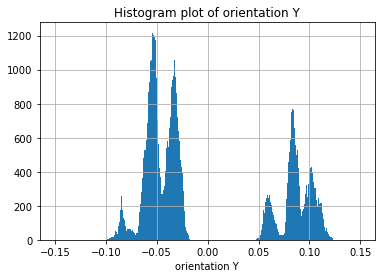

In [98]:
A1 = np.arange(-0.15, 0.15, 0.001).tolist()
df.hist(column='orientation_error.y', bins=A1)
pl.title('Histogram plot of orientation Y')
pl.xlabel("orientation Y")
pl.show()

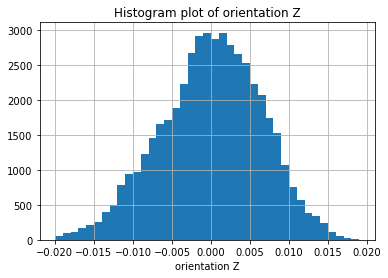

In [100]:
A2 = np.arange(-0.02, 0.02, 0.001).tolist()
df.hist(column='orientation_error.z', bins=A2)
pl.title('Histogram plot of orientation Z')
pl.xlabel("orientation Z")
pl.show()

In [93]:
import numpy as np
k = np.arange(-0.003, 0.003, 0.0001).tolist()

df.hist(column='angular_velocity_error.x', bins=k)
pl.title('Histogram plot of angular_velocity X')
pl.xlabel("angular_velocity X")
pl.show()

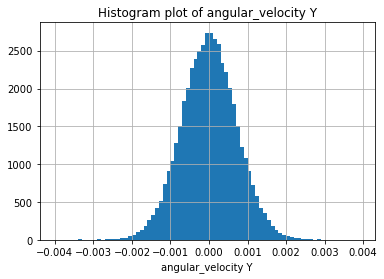

In [94]:

k1 = np.arange(-0.004, 0.004, 0.0001).tolist()
df.hist(column='angular_velocity_error.y', bins=k1)
pl.title('Histogram plot of angular_velocity Y')
pl.xlabel("angular_velocity Y")
pl.show()

In [95]:

df.hist(column='angular_velocity_error.z', bins=k1)
pl.title('Histogram plot of angular_velocity Z')
pl.xlabel("angular_velocity Z")
pl.show()

In [105]:
df1 = pd.read_csv(r'C:\Users\chand\Desktop\Robot Sensing & Navigation\Assignments\LAB3\Mag_new.csv')

In [106]:
df1.head()

%time  field.header.seq   field.header.stamp  \
0  1646095761978426224                 1  1646095761978084564   
1  1646095762003554710                 2  1646095762003258705   
2  1646095762027936996                 3  1646095762027637481   
3  1646095762053858690                 4  1646095762053551197   
4  1646095762078333966                 5  1646095762077781438   

   field.header.frame_id  field.magnetic_field.x  field.magnetic_field.y  \
0                    NaN                 -0.0195                 -0.3248   
1                    NaN                 -0.0195                 -0.3248   
2                    NaN                 -0.0203                 -0.3257   
3                    NaN                 -0.0187                 -0.3248   
4                    NaN                 -0.0195                 -0.3249   

   field.magnetic_field.z  field.magnetic_field_covariance0  \
0                  0.0888                               0.0   
1                  0.0888                               0.0   
2                  0.0888                               0.0   
3                  0.0916                               0.0   
4                  0.0860                               0.0   

   field.magnetic_field_covariance1  field.magnetic_field_covariance2  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   field.magnetic_field_covariance3  field.magnetic_field_covariance4  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   field.magnetic_field_covariance5  field.magnetic_field_covariance6  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   field.magnetic_field_covariance7  field.magnetic_field_covariance8  
0                               0.0                               0.0  
1                               0.0                               0.0  
2                               0.0                               0.0  
3                               0.0                               0.0  
4                               0.0                               0.0

In [107]:
df1["time"] = df["%time"].transform(lambda x: x - x.min())
#df["Time"] = df["field.header.seq"].transform(lambda x: x - x.min())
df1["magnetic_error.x"] = df1["field.magnetic_field.x"].transform(lambda x: x - x.mean())
df1["magnetic_error.y"] = df1["field.magnetic_field.y"].transform(lambda x: x - x.mean())
df1["magnetic_error.z"] = df1["field.magnetic_field.z"].transform(lambda x: x - x.mean())


df1.head()

%time  field.header.seq   field.header.stamp  \
0  1646095761978426224                 1  1646095761978084564   
1  1646095762003554710                 2  1646095762003258705   
2  1646095762027936996                 3  1646095762027637481   
3  1646095762053858690                 4  1646095762053551197   
4  1646095762078333966                 5  1646095762077781438   

   field.header.frame_id  field.magnetic_field.x  field.magnetic_field.y  \
0                    NaN                 -0.0195                 -0.3248   
1                    NaN                 -0.0195                 -0.3248   
2                    NaN                 -0.0203                 -0.3257   
3                    NaN                 -0.0187                 -0.3248   
4                    NaN                 -0.0195                 -0.3249   

   field.magnetic_field.z  field.magnetic_field_covariance0  \
0                  0.0888                               0.0   
1                  0.0888                               0.0   
2                  0.0888                               0.0   
3                  0.0916                               0.0   
4                  0.0860                               0.0   

   field.magnetic_field_covariance1  field.magnetic_field_covariance2  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   field.magnetic_field_covariance3  field.magnetic_field_covariance4  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   field.magnetic_field_covariance5  field.magnetic_field_covariance6  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   field.magnetic_field_covariance7  field.magnetic_field_covariance8  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

       time  magnetic_error.x  magnetic_error.y  magnetic_error.z  
0         0          0.000211         -0.003941         -0.001416  
1  25128486          0.000211         -0.003941         -0.001416  
2  49510772         -0.000589         -0.004841         -0.001416  
3  75432466          0.001011         -0.003941          0.001384  
4  99907742          0.000211         -0.004041         -0.004216

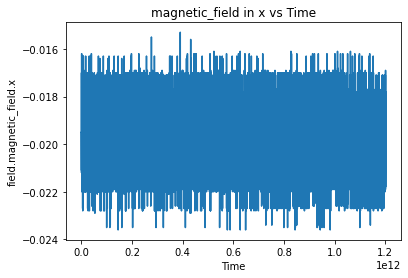

In [111]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('field.magnetic_field.x')
plt.title('magnetic_field in x vs Time')
plt.plot(df1['time'], df1["field.magnetic_field.x"])
plt.show()

In [133]:
print(df1["field.magnetic_field.x"].mean())
print(df1["field.magnetic_field.x"].std())

-0.01971082952183381
0.0010654237347214272


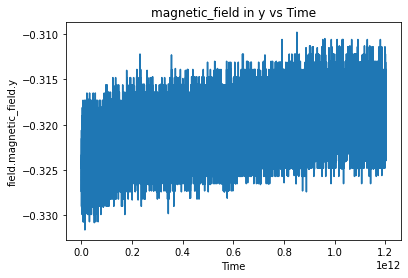

In [112]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('field.magnetic_field.y')
plt.title('magnetic_field in y vs Time')
plt.plot(df1['time'], df1["field.magnetic_field.y"])
plt.show()

In [134]:
print(df1["field.magnetic_field.y"].mean())
print(df1["field.magnetic_field.y"].std())

-0.32085858004154677
0.002913206204611582


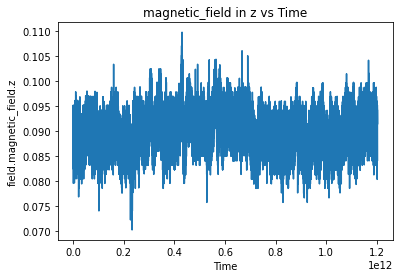

In [113]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('field.magnetic_field.z')
plt.title('magnetic_field in z vs Time')
plt.plot(df1['time'], df1["field.magnetic_field.z"])
plt.show()

In [135]:
print(df1["field.magnetic_field.z"].mean())
print(df1["field.magnetic_field.z"].std())

0.09021602494799706
0.003998167130257025


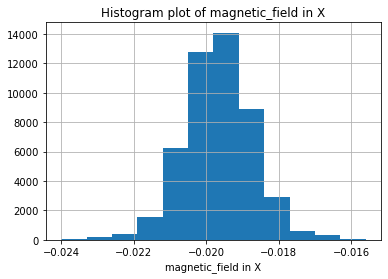

In [129]:
B = np.arange(-0.024, -0.015, 0.0007).tolist()
df1.hist(column='field.magnetic_field.x', bins=B)
pl.title('Histogram plot of magnetic_field in X')
pl.xlabel("magnetic_field in X")
pl.show()

In [127]:
B1 = np.arange(-0.330, -0.310, 0.0009).tolist()
df1.hist(column='field.magnetic_field.y', bins=B1)
pl.title('Histogram plot of magnetic_field in Y')
pl.xlabel("magnetic_field in Y")
pl.show()

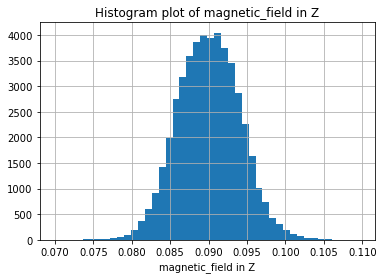

In [132]:
B2 = np.arange(0.070, 0.110, 0.0009).tolist()
df1.hist(column='field.magnetic_field.z', bins=B2)
pl.title('Histogram plot of magnetic_field in Z')
pl.xlabel("magnetic_field in Z")
pl.show()

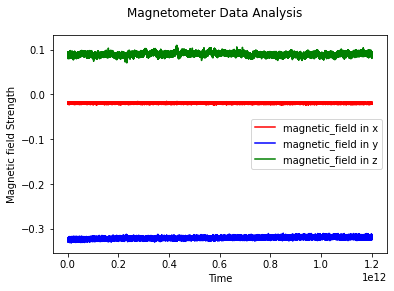

In [139]:
fig = plt.figure()
plt.plot(df1["time"], df1["field.magnetic_field.x"], color = 'red', label = 'magnetic_field')
plt.plot(df1["time"], df1["field.magnetic_field.y"], color = 'blue')
plt.plot(df1["time"], df1["field.magnetic_field.z"], color = 'green')
#plt.plot(df["Time"], df["field.orientation.w"], color = 'yellow')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
fig.suptitle("Magnetometer Data Analysis")
plt.xlabel("Time")
plt.ylabel("Magnetic field Strength")
plt.legend(['magnetic_field in x',"magnetic_field in y", "magnetic_field in z"], loc =0)
plt.show()